# Wizualizacja COVID-19
Projekt odnosi się do aktualnego wydarzenia - pandemii COVID-19. Zakłada on odczyt danych z pliku w formacie csv, uporządkowanie ich oraz przeprowadzenie odpowiednich analiz, w celu uzyskania wykresów i wniosków. 

Wykonawcy:
1. Wojciech Strycharczyk, 255713
2. Kacper Równicki, 255949

Trzy najważniejsze aspekty projektu:
1. Użycie biblioteki `DataFrames`,
2. Uporządkowanie, analiza i wizualizacja danych oraz dyskusja wyników,
3. Prezentacja projektu w skoroszycie Jupytera.

## 0. Wprowadzenie
Dane pochodzą ze strony https://ourworldindata.org/coronavirus-data.

In [1]:
#Instalacja kernela, który nie pokazuje ostrzeżeń.
using IJulia
IJulia.installkernel("Julia nodeps", "--depwarn=no")

┌ Info: Installing Julia nodeps kernelspec in /Users/Kacper/Library/Jupyter/kernels/julia-nodeps-1.3
└ @ IJulia /Users/Kacper/.julia/packages/IJulia/yLI42/deps/kspec.jl:78


"/Users/Kacper/Library/Jupyter/kernels/julia-nodeps-1.3"

Zacznijmy od załadowania odpowiednich bibliotek.

In [212]:
using DataFrames
using CSV
using Plots
using StatPlots



pyplot()

Plots.PyPlotBackend()

Możemy rozpocząć pracę. Rozpoczynamy od odczytania `DataFrame`, oraz uzyskania podstawowych informacji o naszych danych.

In [181]:
covid = DataFrame(CSV.File("covid-data.csv")); first(covid, 6)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths
,String?,String,Date,Int64,Int64,Int64,Int64
1,ABW,Aruba,2020-03-13,2,2,0,0
2,ABW,Aruba,2020-03-20,4,2,0,0
3,ABW,Aruba,2020-03-24,12,8,0,0
4,ABW,Aruba,2020-03-25,17,5,0,0
5,ABW,Aruba,2020-03-26,19,2,0,0
6,ABW,Aruba,2020-03-27,28,9,0,0


Przyjrzyjmy się wszystkim kolumnom oraz ich jednostkom.

In [4]:
for name in names(covid)
    println(name)
end

iso_code
location
date
total_cases
new_cases
total_deaths
new_deaths
total_cases_per_million
new_cases_per_million
total_deaths_per_million
new_deaths_per_million
total_tests
new_tests
total_tests_per_thousand
new_tests_per_thousand
new_tests_smoothed
new_tests_smoothed_per_thousand
tests_units
stringency_index
population
population_density
median_age
aged_65_older
aged_70_older
gdp_per_capita
extreme_poverty
cvd_death_rate
diabetes_prevalence
female_smokers
male_smokers
handwashing_facilities
hospital_beds_per_100k


Zaletą zaimportowanego pliku `.csv` jest dostęp do bardzo specyficznych danych każdego kraju, dzięki czemu możemy poruszyć kilka ciekawych kwestii w tym projekcie.

## 1. Początek

### Wybuch epidemii w Chinach
Epidemia koronawirusa rozpoczęła się na przełomie roku 2019 i 2020. To wtedy, z Chin, zaczynały napływac pierwsze informacje o nowej, nieznanej chorobie. Zobaczmy jak szybko rosła liczba zakażonych COVID-19. 

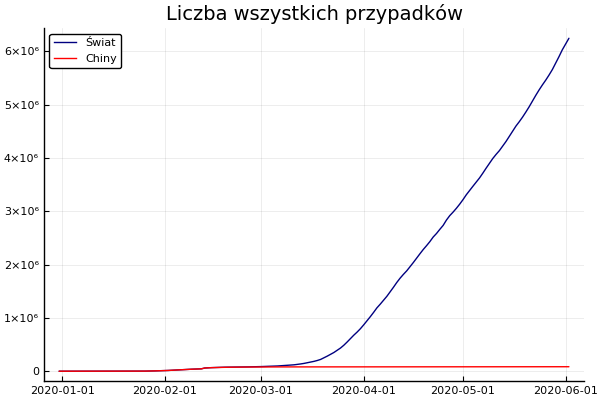

In [5]:
worldwide = covid[covid[:location] .== "World", :]
china = covid[covid[:location] .== "China", :]

plot(worldwide[:date], worldwide[:total_cases], label = "Świat",
                                                title = "Liczba wszystkich przypadków",
                                                color = :navy)

plot!(china[:date], china[:total_cases], label="Chiny", color = :red)

Możemy zauważyć, że do początku marca problem koronawirusa dotyczył niemal tylko i wyłącznie Chin. Dopiero potem liczba chorych zaczęła lawinowo rosnąć na całym świecie. Skalę zjawiska dobrze pokazuje także wykres o **skali logarytmicznej**.

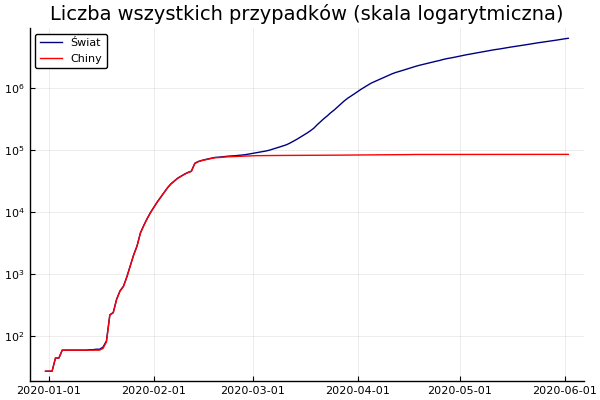

In [6]:
plot(worldwide[:date], worldwide[:total_cases], label = "Świat",
                                                title = "Liczba wszystkich przypadków (skala logarytmiczna)",
                                                color = :navy,
                                                yaxis = :log)

plot!(china[:date], china[:total_cases], label="Chiny",
                                                color = :red,
                                                yaxis = :log)

Można powiedzieć, że epidemia w Chinach zakończyła się na początku marca. Widać to na wykresie słupkowym nowych przypadków. Uwagę przykłuwa aż 15000 przypadkó 13 lutego. Było to spowodowane zmianą sposobu klasyfikacji chorych - przed tym dniem za chorych uznawano wyłącznie osoby hospitalizowane. Tamtego dnia zdecydowano się na dopisanie przypadków, które nie wymagały leczenia w szpitalu, a dały pozytywny wynik testu.


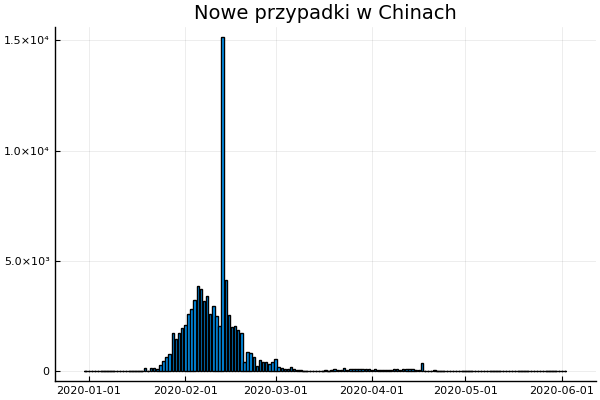

In [7]:
bar(china[:date], china[:new_cases], title="Nowe przypadki w Chinach", label=:none)

### Ogniska zachorowań
Spośród wszystkich krajów, możemy wyróżnić kilka, które mają najwięcej zachorowań.

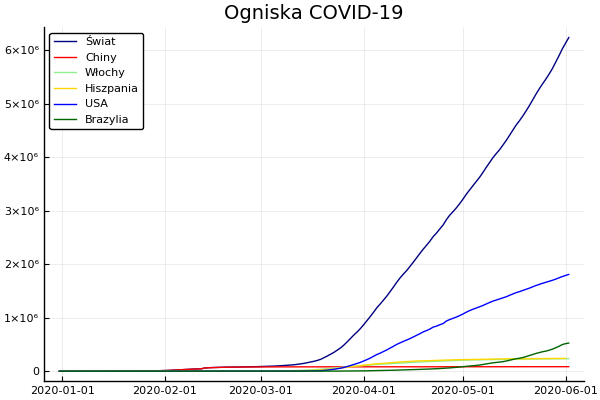

In [280]:
worldwide = covid[covid[:location] .== "World", :]
china = covid[covid[:location] .== "China", :]
italy = covid[covid[:location] .== "Italy", :]
spain = covid[covid[:location] .== "Spain", :]
usa = covid[covid[:location] .== "United States", :]
brazil = covid[covid[:location] .== "Brazil", :]

plot(worldwide[:date], worldwide[:total_cases], label = "Świat",
                                                title = "Ogniska COVID-19",
                                                color = :navy)

plot!(china[:date], china[:total_cases], label="Chiny", color = :red)
plot!(italy[:date], italy[:total_cases], label="Włochy", color = :lightgreen)
plot!(spain[:date], spain[:total_cases], label="Hiszpania", color = :gold)
plot!(usa[:date], usa[:total_cases], label="USA", color = :blue)
plot!(brazil[:date], brazil[:total_cases], label="Brazylia", color = :darkgreen)

### Zależność między zaraźliwością Covid-19 i populacją kraju
Sprawdźmy, jak wyglądają statystki w przeliczeniu na milion mieszkańców.  

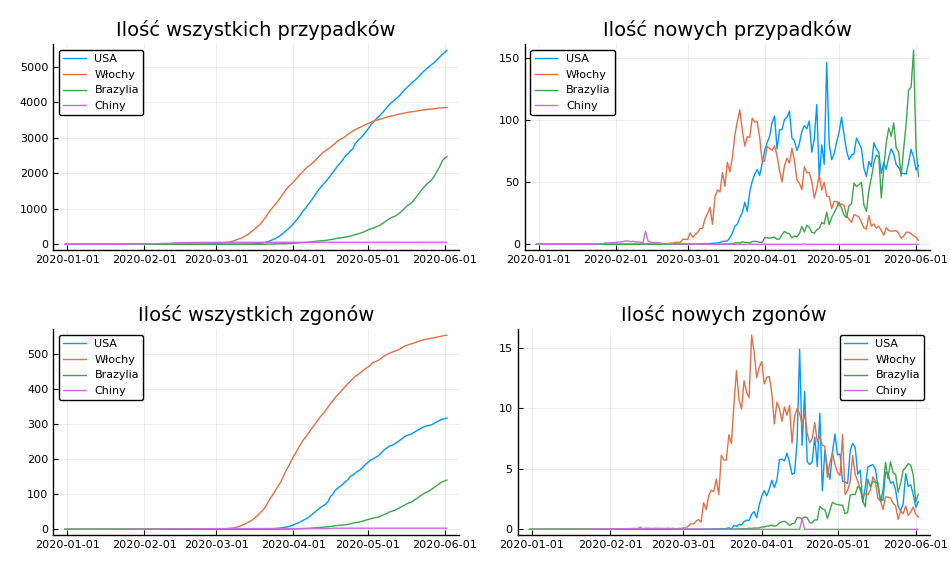

In [19]:
using Plots.PlotMeasures #Aby posługiwać się px jako jednostkami

p1 = plot(usa[:date], usa[:total_cases_per_million], label="USA", title="Ilość wszystkich przypadków")
plot!(italy[:date], italy[:total_cases_per_million], label="Włochy")
plot!(brazil[:date], brazil[:total_cases_per_million], label="Brazylia")
plot!(china[:date], china[:total_cases_per_million], label="Chiny")

p2 = plot(usa[:date], usa[:new_cases_per_million], label="USA", title="Ilość nowych przypadków")
plot!(italy[:date], italy[:new_cases_per_million], label="Włochy")
plot!(brazil[:date], brazil[:new_cases_per_million], label="Brazylia")
plot!(china[:date], china[:new_cases_per_million], label="Chiny")

p3 = plot(usa[:date], usa[:total_deaths_per_million], label="USA", title = "Ilość wszystkich zgonów")
plot!(italy[:date], italy[:total_deaths_per_million], label="Włochy")
plot!(brazil[:date], brazil[:total_deaths_per_million], label="Brazylia")
plot!(china[:date], china[:total_deaths_per_million], label="Chiny")

p4 = plot(usa[:date], usa[:new_deaths_per_million], label="USA", title = "Ilość nowych zgonów")
plot!(italy[:date], italy[:new_deaths_per_million], label="Włochy")
plot!(brazil[:date], brazil[:new_deaths_per_million], label="Brazylia")
plot!(china[:date], china[:new_deaths_per_million], label="Chiny")

plot(p1,p2, p3, p4, layout=4, size=size=(950,570), tight_layout=true, margin=20px)




## Wszystkie wykresy prezentują odpowiednie wartości w przeliczeniu na milion mieszkańców.


### Zobaczmy, jak wygląda struktura wiekowa w powyższych krajach

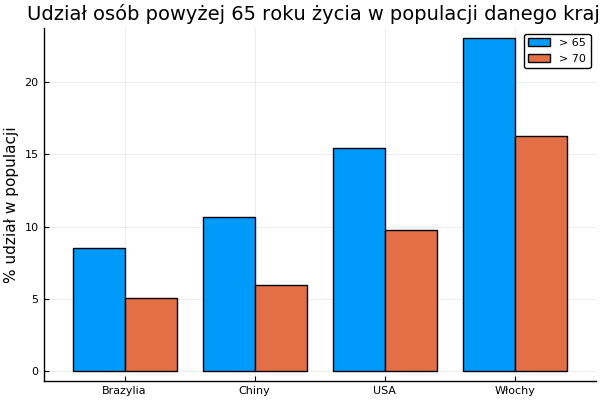

In [149]:
values = Array{Float64,1}()
for country in [usa, italy, brazil, china] #65_older_values
    push!(values, country[:aged_65_older][1])
end

for country in [usa, italy, brazil, china] #70_older_values
    push!(values, country[:aged_70_older][1])
end

mn = [2, 35, 30, 35, 27, 3, 32, 34]
sx = repeat(["> 65", "> 70"], inner = 4)
std = [2, 3, 4, 1, 2, 3, 5, 2, 3, 3]
nam = repeat(["USA", "Włochy", "Brazylia", "Chiny"], outer=2)

groupedbar(nam, values, group = sx, ylabel = "% udział w populacji", 
        title = "Udział osób powyżej 65 i 70 roku życia w populacji danego kraju")

## Sprawdźmy, czy liczba wykonywanych testów ma znaczenie
Na początku zobaczmy, które kraje wykonują najwięcej testów na 1000 mieszkańców(na dzień 28 maja)

In [330]:
tests_data = covid[covid[:date] .== Date(2020, 5, 28), :][:, [:location, :new_tests_per_thousand, :new_tests,  ]] |> unique |>dropmissing
tests_data = sort!(tests_data, :new_tests_per_thousand, rev=true); first(tests_data, 8)

,location,new_tests_per_thousand,new_tests
,String,Float64,Float64
1,Bahrain,3.965,6746.0
2,Lithuania,2.48,6750.0
3,Qatar,2.032,5853.0
4,Russia,1.955,285288.0
5,Luxembourg,1.518,950.0
6,Maldives,1.474,797.0
7,Kazakhstan,1.327,24921.0
8,Italy,1.255,75893.0


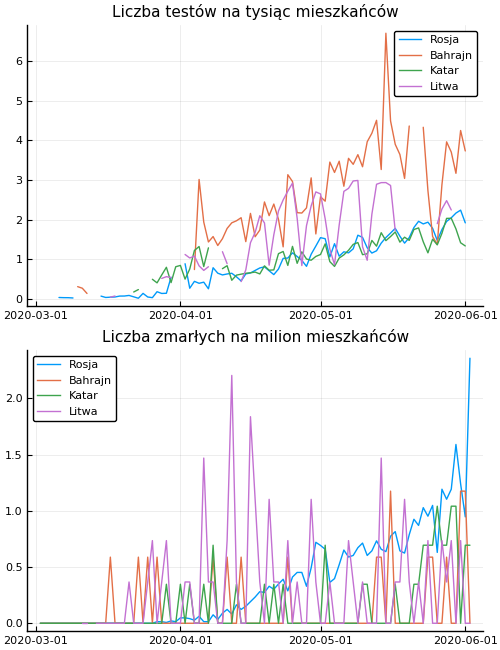

In [340]:
russia = covid[(covid[:location] .== "Russia") .& (covid[:date] .> Date(2020,3,1)) , :]
bahrain = covid[(covid[:location] .== "Bahrain") .& (covid[:date] .> Date(2020,3,1)) , :]
qatar = covid[(covid[:location] .== "Qatar") .& (covid[:date] .> Date(2020,3,1)) , :]
lithuania = covid[(covid[:location] .== "Lithuania") .& (covid[:date] .> Date(2020,3,1)) , :]

labels = ["Rosja", "Bahrajn", "Katar", "Litwa"]
countries = [russia, bahrain, qatar, lithuania]

p1 = plot(title="Liczba testów na tysiąc mieszkańców", label="USA", titlefont=font(11))
p2 = plot(title="Liczba zmarłych na milion mieszkańców", label="USA", titlefont=font(11))

for country in zip(countries, labels)
    df = country[1]
    plot!(p1, df[:date], df[:new_tests_per_thousand], label=country[2])
    plot!(p2, df[:date], df[:new_deaths_per_million], label=country[2])
end



plot(p1, p2, layout=(2,1), size=(500,650))




Jak widzimy na przykładzie Bahrajnu, mimo dużej liczby wykonywaych testów na 1000 mieszkańców, śmiertelność nie malała proporcjonalnie do tego czynnika oraz oscylowała na podobnym poziomie do innych krajów. Podobnie w Katarze.

Od początku marca śmiertelność w Rosji rosła, mimo zwiekszającej się liczby testów. 

W związku z tym, nie widać zależności między liczbą wykonywanych testów a liczbą zmarłych.



### Sprawdźmy, czy ilość nowych przypadków jest powiązana z liczbą wykonywanych testów
Ponownie przyjrzyjmy się krajom, które wykonują najwięcej testów w odniesieniu do populacji.

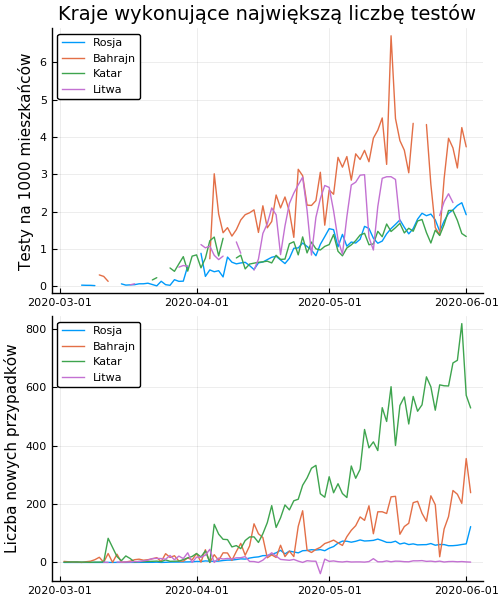

In [341]:
labels = ["Rosja", "Bahrajn", "Katar", "Litwa"]
countries = [russia, bahrain, qatar, lithuania]

p1 = plot(ylabel="Testy na 1000 mieszkańców", title="Kraje wykonujące największą liczbę testów")
p2 = plot(ylabel="Liczba nowych przypadków")
for country in zip(countries,labels)
    df = country[1]
    plot!(p1, df[:date], df[:new_tests_per_thousand], label=country[2])
    plot!(p2, df[:date], df[:new_cases_per_million], label=country[2])
end
plot(p1, p2, layout=(2,1), size=(500,600))

Jak widzimy na przykładzie Kataru, liczba nowo zdiagnozowanych na Covid-19 zwiększała się wraz ze wzrostem liczby testów. Podobną zależność widzimy w Bahrajnie oraz Rosji. 

W Litwie natomiast liczba nowo zdiagnozowanych na milion mieszkańców była bardzo niska, a czasami nawet ujemna! Możemy przypuszczać, że było tak za sprawą ilości przeprowadzanych testów, co skutkowało szybkim wykrywaniem zarażonych. 

Warto podkreślić, że pod koniec maja w Bahrajnie możemy zawuażyć duży spadek ilości badanych pod kątem Covid-19, zarówno jak i spadek liczby nowo zarażonych. Następnie, kiedy liczba testów wzrosła, liczba nowo zarażonych również.

Biorąc pod uwagę powyższe przypadki, możemy przypuszczać, że ilość zidentyfikowanych nowo zarażonych Covid-19 silnie zależy od liczby przeprowadzanych testów.

### Wypływ liczby szpitalnych łóżek na śmiertelność Covid-19

Na początku sprawdźmy, które kraje mają najwięcej łóżek na 100 tysięcy mieszkańców.

In [505]:
beds_sorted = covid[[:location, :hospital_beds_per_100k]] |> unique |> dropmissing
beds_sorted = sort!(beds_sorted, :hospital_beds_per_100k, rev=true)
first(beds_sorted, 8)

,location,hospital_beds_per_100k
,String,Float64
1,Monaco,13.8
2,Japan,13.05
3,South Korea,12.27
4,Belarus,11.0
5,Ukraine,8.8
6,Russia,8.05
7,Germany,8.0
8,Bulgaria,7.454


#### Ponieważ Monaco liczy jedynie 39 tysięcy mieszkańców, dane mogą być niewirygodne. Sprawdźmy zatem 5 kolejnych państw.

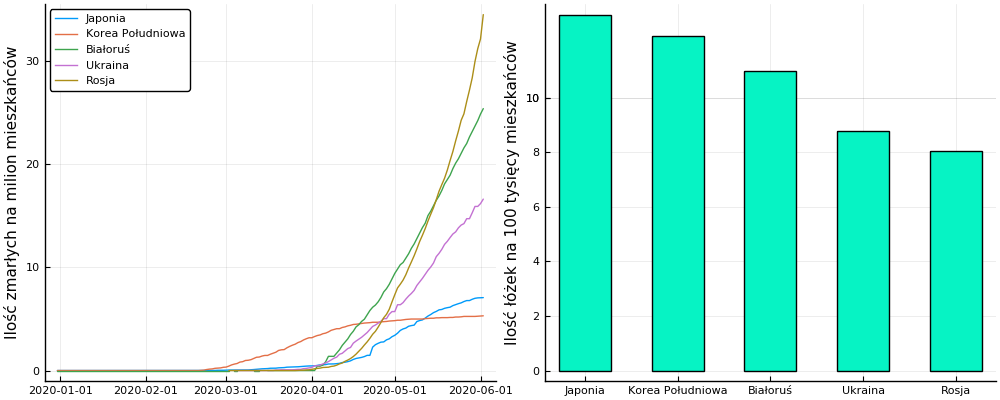

In [546]:
japan = covid[covid[:location] .== "Japan", :]
south_korea = covid[covid[:location] .== "South Korea", :]
belarus = covid[covid[:location] .== "Belarus", :]
ukraine = covid[covid[:location] .== "Ukraine", :]
germany = covid[covid[:location] .== "Germany", :]

p1 = plot(ylabel="Ilość zmarłych na milion mieszkańców")
p2 = bar(ylabel="Ilość łóżek na 100 tysięcy mieszkańców")
labels = ["Japonia", "Korea Południowa", "Białoruś", "Ukraina", "Rosja"]
countries = [japan, south_korea, belarus, ukraine, russia, germany]

for country in zip(countries, labels)
    df = country[1]
    plot!(p1, df[:date], df[:total_deaths_per_million], label=country[2])
    bar!(p2, [country[2]], [df[:hospital_beds_per_100k][1]], color = RGB(6/255,243/255,196/255), legend=false)
end

p = plot(p1,p2, size=(1000,400))


### Dodatkowo prównujamy te kraje z Wielką Brytanią oraz USA (liczba zmarłych w tych krajach jest największa)

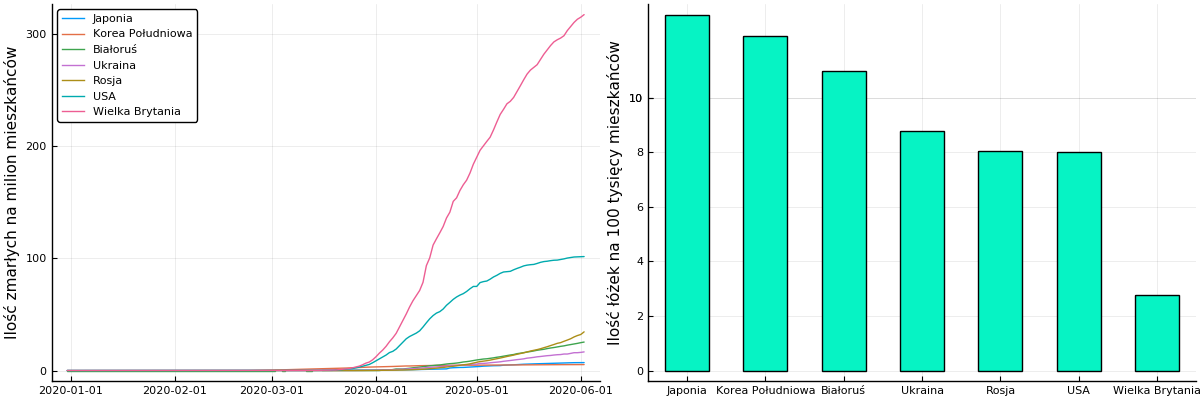

In [545]:
united_kingdom = covid[covid[:location] .== "United Kingdom", :]

p1 = plot(ylabel="Ilość zmarłych na milion mieszkańców")
p2 = bar(ylabel="Ilość łóżek na 100 tysięcy mieszkańców")
labels = ["Japonia", "Korea Południowa", "Białoruś", "Ukraina", "Rosja", "USA", "Wielka Brytania"]
countries = [japan, south_korea, belarus, ukraine, russia, germany, usa, united_kingdom]

for country in zip(countries, labels)
    df = country[1]
    plot!(p1, df[:date], df[:total_deaths_per_million], label=country[2])
    bar!(p2, [country[2]], [df[:hospital_beds_per_100k][1]], legend=false, color = RGB(6/255,243/255,196/255))
end

p = plot(p1,p2, size=(1200,400))



Na powyższych wykresach możemy zauważyć, że kraje z większą ilością łóżek lepiej radzą sobie z pandemią. (Liczba zmarłych na milion mieszkańców jest niższa) Jednak zależności te nie są wprost proporcjonalne, co widać na przykładzie Rosji oraz USA. Mimo że liczba łóżek prawie się nie różni, śmiertelność w USA jest znacznie wyższa. 